In [1]:
# libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#To display the plots
%matplotlib inline

# scikit learn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, accuracy_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import make_scorer, average_precision_score, PrecisionRecallDisplay, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer
from sklearn.pipeline import Pipeline

import scikitplot as skplt

# yellowbrick library for visualizing the model performance
from yellowbrick.classifier import ConfusionMatrix, PrecisionRecallCurve
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.pipeline import Pipeline

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid", {'axes.grid' : True})

# To display maximum columns
pd.set_option('display.max_columns', 50)

# To display maximum rows
pd.set_option('display.max_rows', 50)

# To set float format
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
df0 = pd.read_csv('train.csv')
df = df0.copy()

In [3]:
df.head()

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.44,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.90,37.31,Etmiyor,obek_4,102.94
1,1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,246298.61,Küçük Şehir,Spor Malzemeleri,4145.73,11.55,Etmiyor,obek_5,82.18
2,2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,268582.73,Küçük Şehir,Giyim,9924.38,55.35,Ediyor,obek_8,141.66
3,3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,327721.84,Kırsal,Giyim,6417.78,15.42,Etmiyor,obek_3,17.10
4,4,Erkek,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,397431.63,Büyük Şehir,Giyim,7886.66,14.69,Etmiyor,obek_3,20.47


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   index                                       5460 non-null   int64  
 1   Cinsiyet                                    5460 non-null   object 
 2   Yaş Grubu                                   5460 non-null   object 
 3   Medeni Durum                                5460 non-null   object 
 4   Eğitim Düzeyi                               5460 non-null   object 
 5   İstihdam Durumu                             5460 non-null   object 
 6   Yıllık Ortalama Gelir                       5460 non-null   float64
 7   Yaşadığı Şehir                              5460 non-null   object 
 8   En Çok İlgilendiği Ürün Grubu               5460 non-null   object 
 9   Yıllık Ortalama Satın Alım Miktarı          5460 non-null   float64
 10  Yıllık Ortal

In [4]:
obek_4 =df[df["Öbek İsmi"] == "obek_4"]
obek_4

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.44,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.90,37.31,Etmiyor,obek_4,102.94
24,24,Erkek,31-40,Bekar,Üniversite Mezunu,Kendi İşinin Sahibi,141995.91,Köy veya Kasaba,Elektronik ve Teknolojik Ürünler,6679.54,1.23,Etmiyor,obek_4,9.91
37,37,Erkek,31-40,Bekar,Yüksekokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,969107.29,Küçük Şehir,Elektronik ve Teknolojik Ürünler,32814.50,35.50,Etmiyor,obek_4,96.97
44,44,Erkek,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,1062555.09,Büyük Şehir,Giyim,31050.54,40.20,Etmiyor,obek_4,94.94
59,59,Erkek,18-30,Bekar,Yüksekokul Mezunu,Düzenli ve Ücretli Bir İşi Var,724183.94,Büyük Şehir,Ev ve Mobilya,34882.47,36.87,Etmiyor,obek_4,77.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5442,5442,Kadın,31-40,Bekar,İlkokul Mezunu,Düzenli ve Ücretli Bir İşi Var,835001.41,Köy veya Kasaba,Kozmetik,33381.85,41.41,Etmiyor,obek_4,92.78
5443,5443,Kadın,31-40,Bekar,Üniversite Mezunu,Kendi İşinin Sahibi,1171120.45,Büyük Şehir,Elektronik ve Teknolojik Ürünler,30032.38,37.22,Etmiyor,obek_4,99.70
5444,5444,Erkek,31-40,Bekar,Doktora Mezunu,İşsiz veya Düzenli Bir İşi Yok,818056.66,Büyük Şehir,Kozmetik,38202.50,40.79,Ediyor,obek_4,86.40
5452,5452,Erkek,18-30,Evli,Üniversite Mezunu,İşsiz veya Düzenli Bir İşi Yok,885823.51,Büyük Şehir,Spor Malzemeleri,34082.08,40.08,Etmiyor,obek_4,96.79


In [5]:
obek_4["Cinsiyet"].value_counts()

Cinsiyet
Erkek    368
Kadın    352
Name: count, dtype: int64

In [6]:
obek_4["Yaş Grubu"].value_counts()


Yaş Grubu
31-40    412
18-30    292
51-60      9
41-50      5
>60        2
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   index                                       5460 non-null   int64  
 1   Cinsiyet                                    5460 non-null   object 
 2   Yaş Grubu                                   5460 non-null   object 
 3   Medeni Durum                                5460 non-null   object 
 4   Eğitim Düzeyi                               5460 non-null   object 
 5   İstihdam Durumu                             5460 non-null   object 
 6   Yıllık Ortalama Gelir                       5460 non-null   float64
 7   Yaşadığı Şehir                              5460 non-null   object 
 8   En Çok İlgilendiği Ürün Grubu               5460 non-null   object 
 9   Yıllık Ortalama Satın Alım Miktarı          5460 non-null   float64
 10  Yıllık Ortal

In [8]:
df.shape

(5460, 14)

In [9]:
# descriptive statistics for numerical columns

df.describe().T.style.background_gradient(axis=1, cmap="Spectral")

,count,mean,std,min,25%,50%,75%,max
index,5460.000000,2729.500000,1576.310566,0.000000,1364.750000,2729.500000,4094.250000,5459.000000
Yıllık Ortalama Gelir,5460.000000,363571.133428,219714.442407,43922.988693,215693.439307,286925.436073,468188.221798,1192437.145258
Yıllık Ortalama Satın Alım Miktarı,5460.000000,16616.612217,14099.171704,2859.254000,4931.859057,8426.818967,30579.244695,48605.594415
Yıllık Ortalama Sipariş Verilen Ürün Adedi,5460.000000,24.040884,14.945655,0.000000,11.550502,20.095924,35.918161,64.616196
Yıllık Ortalama Sepete Atılan Ürün Adedi,5460.000000,73.445693,47.214184,3.977559,25.009168,82.485579,104.473291,242.308441


In [10]:
# descriptive statistics for categorical columns

df.describe(include="O").T

,count,unique,top,freq
Cinsiyet,5460,2,Erkek,2964
Yaş Grubu,5460,5,18-30,1841
Medeni Durum,5460,2,Evli,2834
Eğitim Düzeyi,5460,9,Lise Mezunu,1388
İstihdam Durumu,5460,4,Düzenli ve Ücretli Bir İşi Var,2768
Yaşadığı Şehir,5460,4,Büyük Şehir,1959
En Çok İlgilendiği Ürün Grubu,5460,5,Giyim,1487
Eğitime Devam Etme Durumu,5460,2,Etmiyor,4554
Öbek İsmi,5460,8,obek_4,720


In [11]:
df['Öbek İsmi'].value_counts()

Öbek İsmi
obek_4    720
obek_8    717
obek_5    706
obek_3    695
obek_7    695
obek_1    692
obek_6    688
obek_2    547
Name: count, dtype: int64

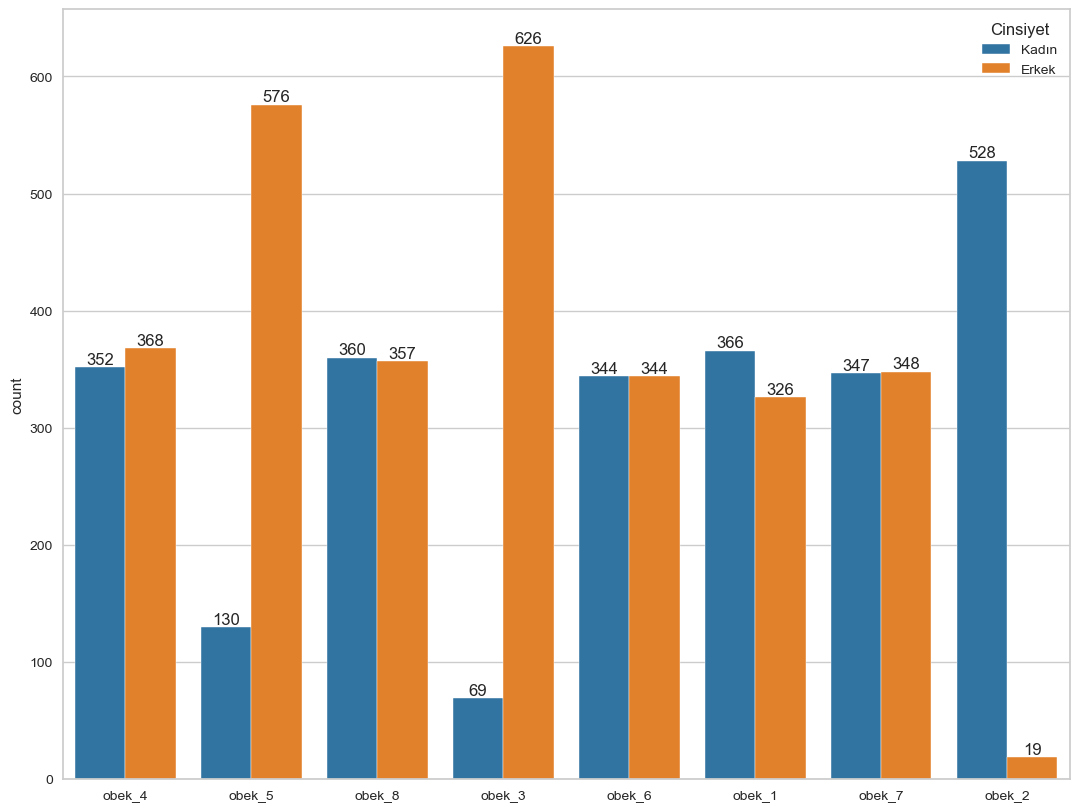

In [12]:
plt.figure(figsize=(13, 10))
ax = sns.countplot(x = 'Öbek İsmi', data = df, palette="tab10", hue="Cinsiyet")
plt.xlabel("")
for container in ax.containers:
    ax.bar_label(container)

plt.show()

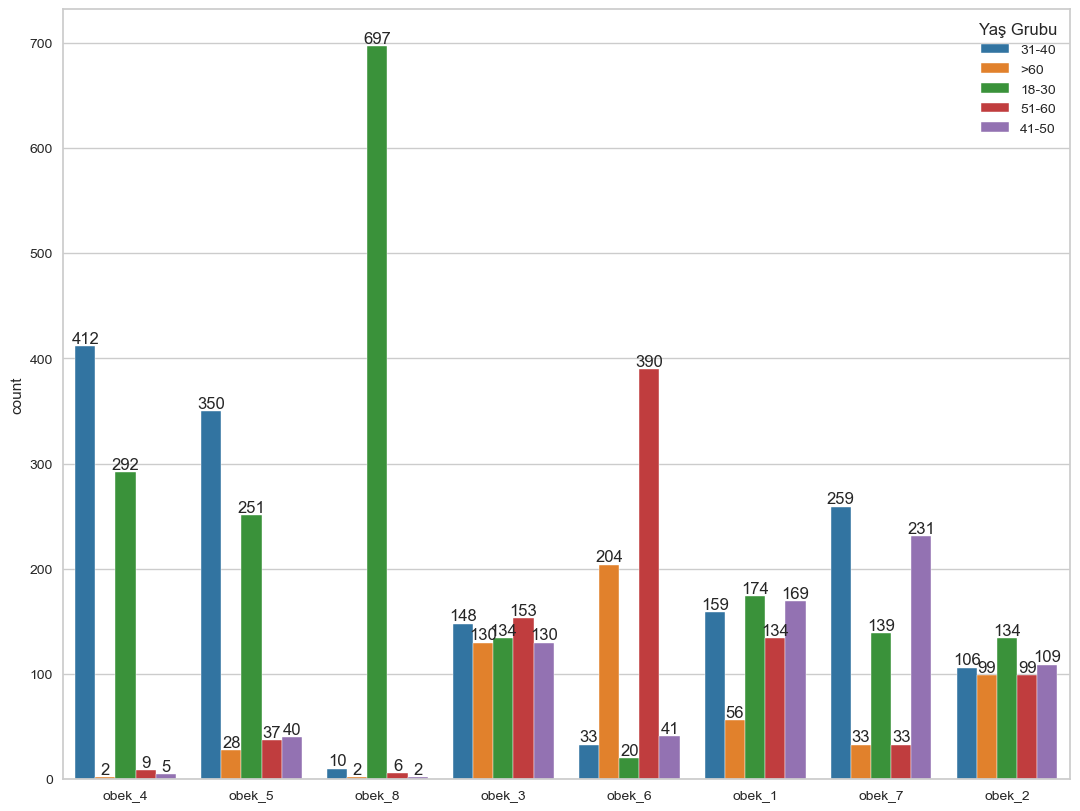

In [13]:
plt.figure(figsize=(13, 10))
ax = sns.countplot(x = 'Öbek İsmi', data = df, palette="tab10", hue="Yaş Grubu")
plt.xlabel("")
for container in ax.containers:
    ax.bar_label(container)

plt.show()

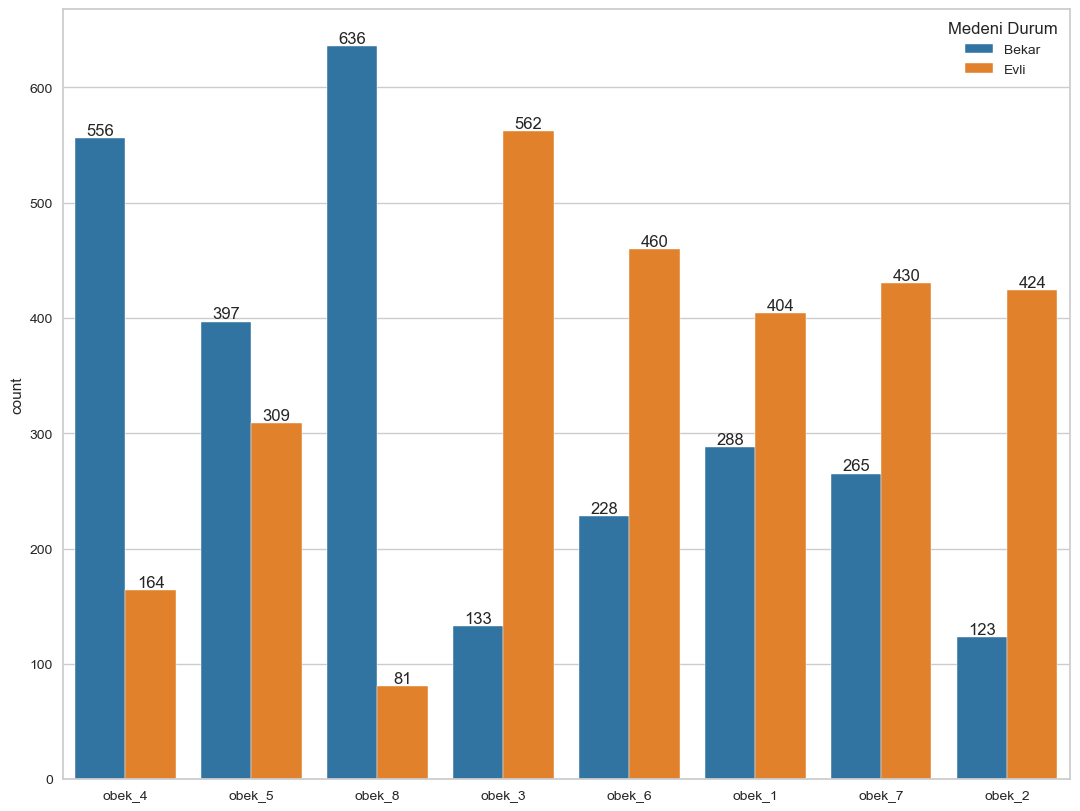

In [14]:
plt.figure(figsize=(13, 10))
ax = sns.countplot(x = 'Öbek İsmi', data = df, palette="tab10", hue="Medeni Durum")
plt.xlabel("")
for container in ax.containers:
    ax.bar_label(container)

plt.show()

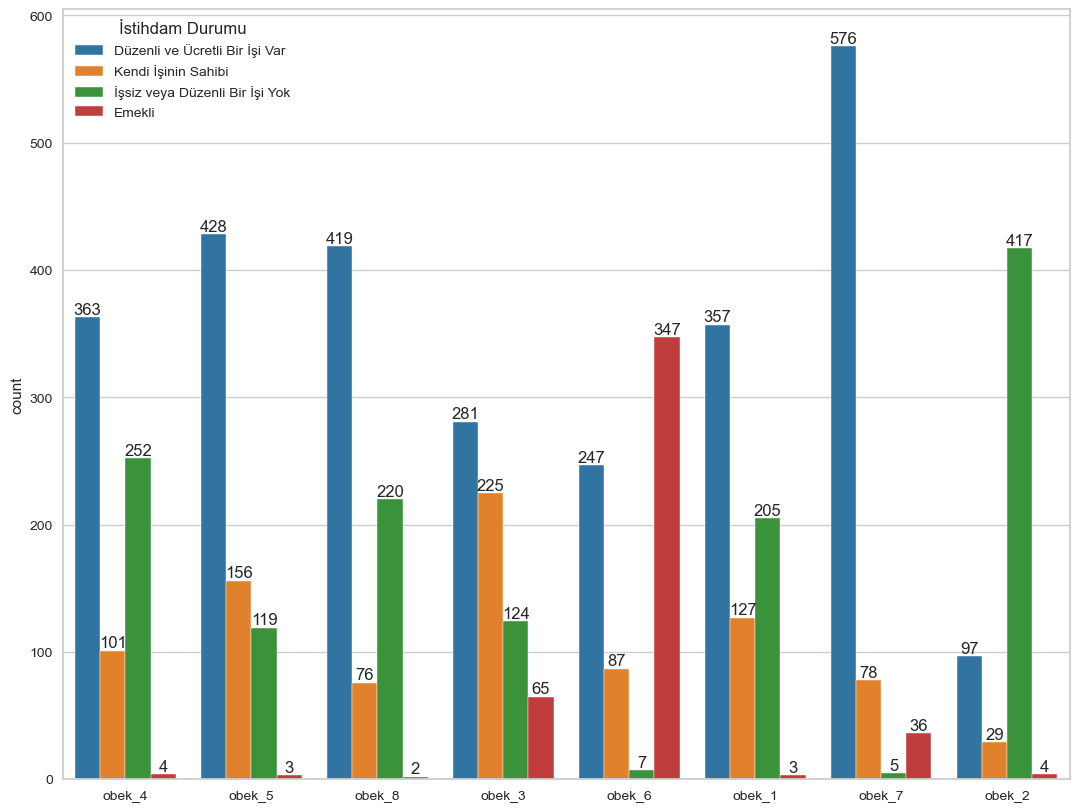

In [15]:
plt.figure(figsize=(13, 10))
ax = sns.countplot(x = 'Öbek İsmi', data = df, palette="tab10", hue="İstihdam Durumu")
plt.xlabel("")
for container in ax.containers:
    ax.bar_label(container)

plt.show()

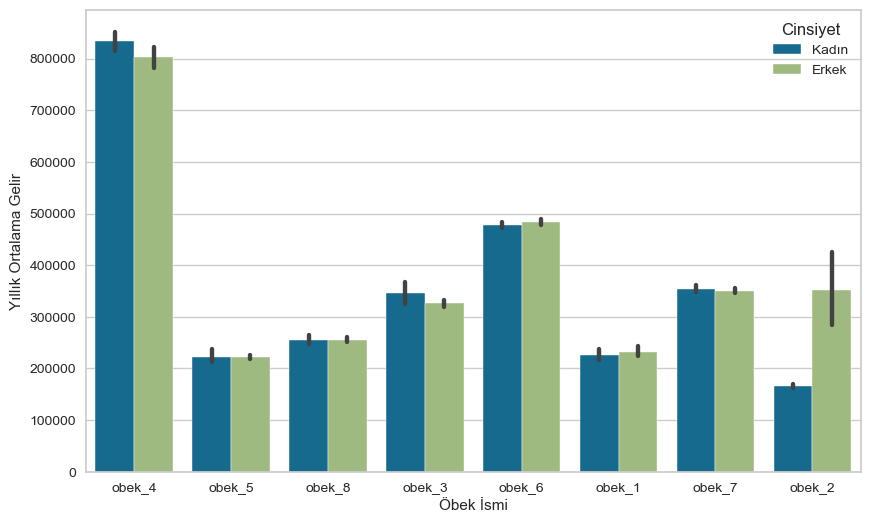

In [16]:
sns.barplot(x="Öbek İsmi", y="Yıllık Ortalama Gelir", hue = "Cinsiyet",  data=df);

In [17]:
df.groupby("Öbek İsmi")["Yıllık Ortalama Gelir"].mean().sort_values()

Öbek İsmi
obek_2   172827.51
obek_5   222224.04
obek_1   229513.85
obek_8   255354.93
obek_3   327899.09
obek_7   351949.98
obek_6   480117.78
obek_4   817975.52
Name: Yıllık Ortalama Gelir, dtype: float64

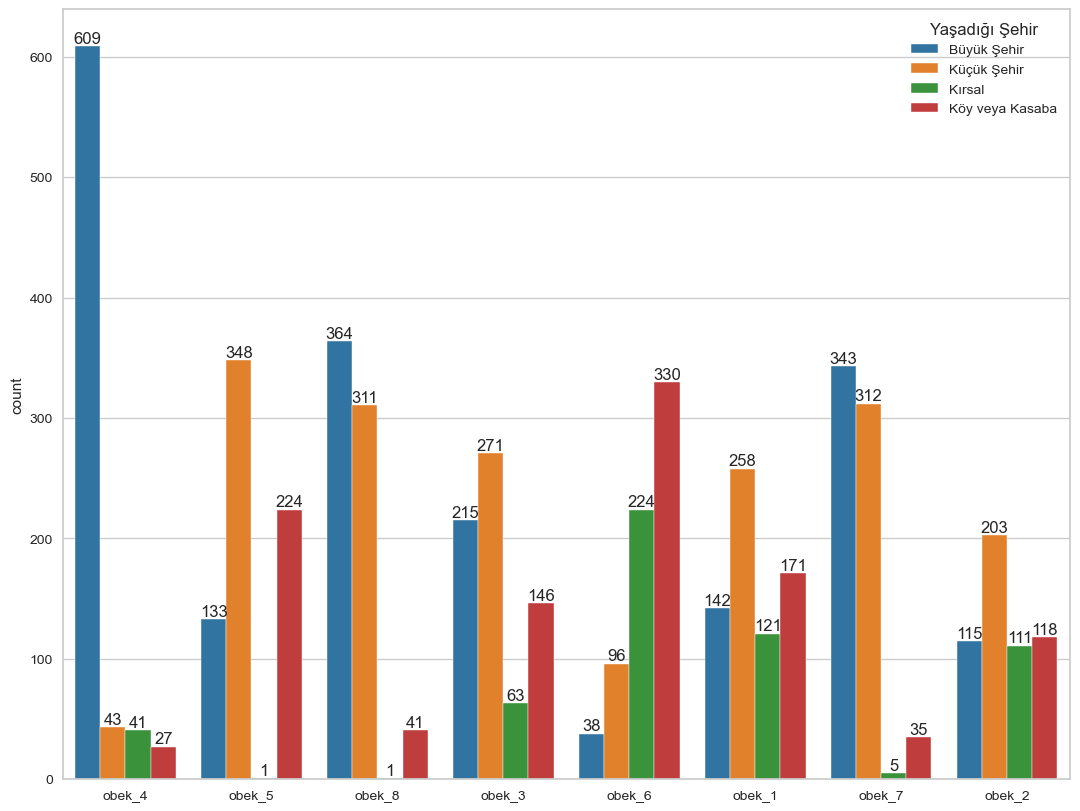

In [18]:
plt.figure(figsize=(13, 10))
ax = sns.countplot(x = 'Öbek İsmi', data = df, palette="tab10", hue="Yaşadığı Şehir")
plt.xlabel("")
for container in ax.containers:
    ax.bar_label(container)

plt.show()

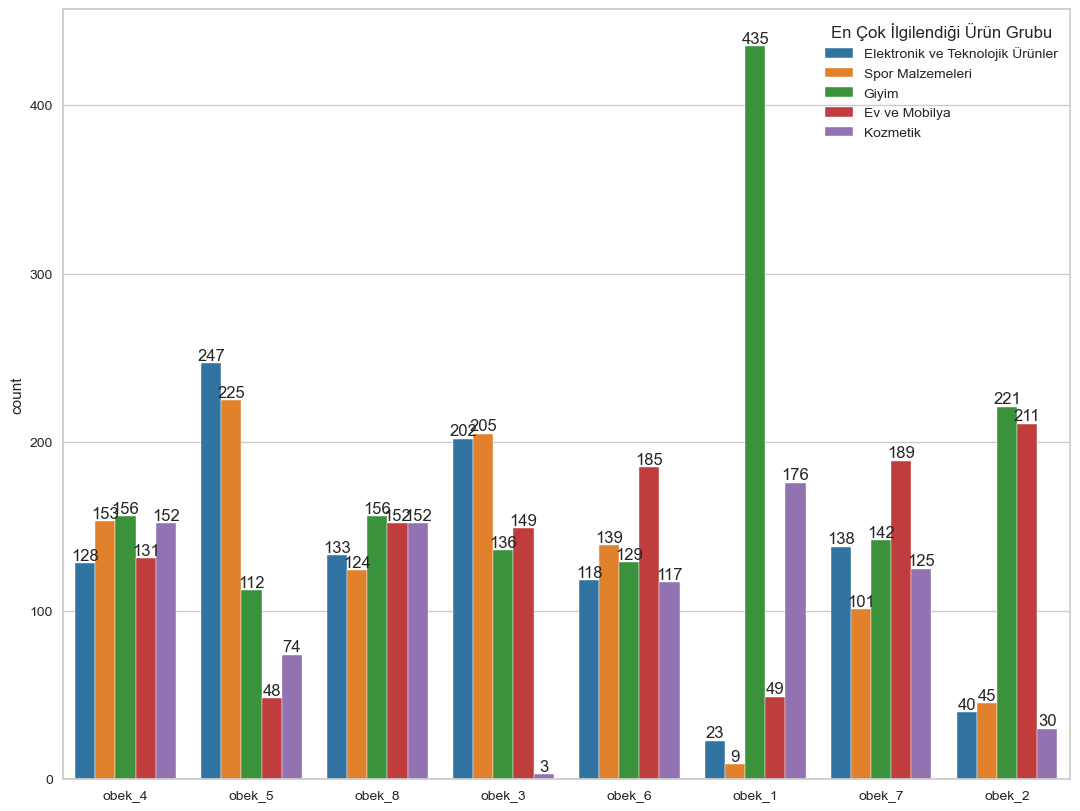

In [19]:
plt.figure(figsize=(13, 10))
ax = sns.countplot(x = 'Öbek İsmi', data = df, palette="tab10", hue="En Çok İlgilendiği Ürün Grubu")
plt.xlabel("")
for container in ax.containers:
    ax.bar_label(container)

plt.show()

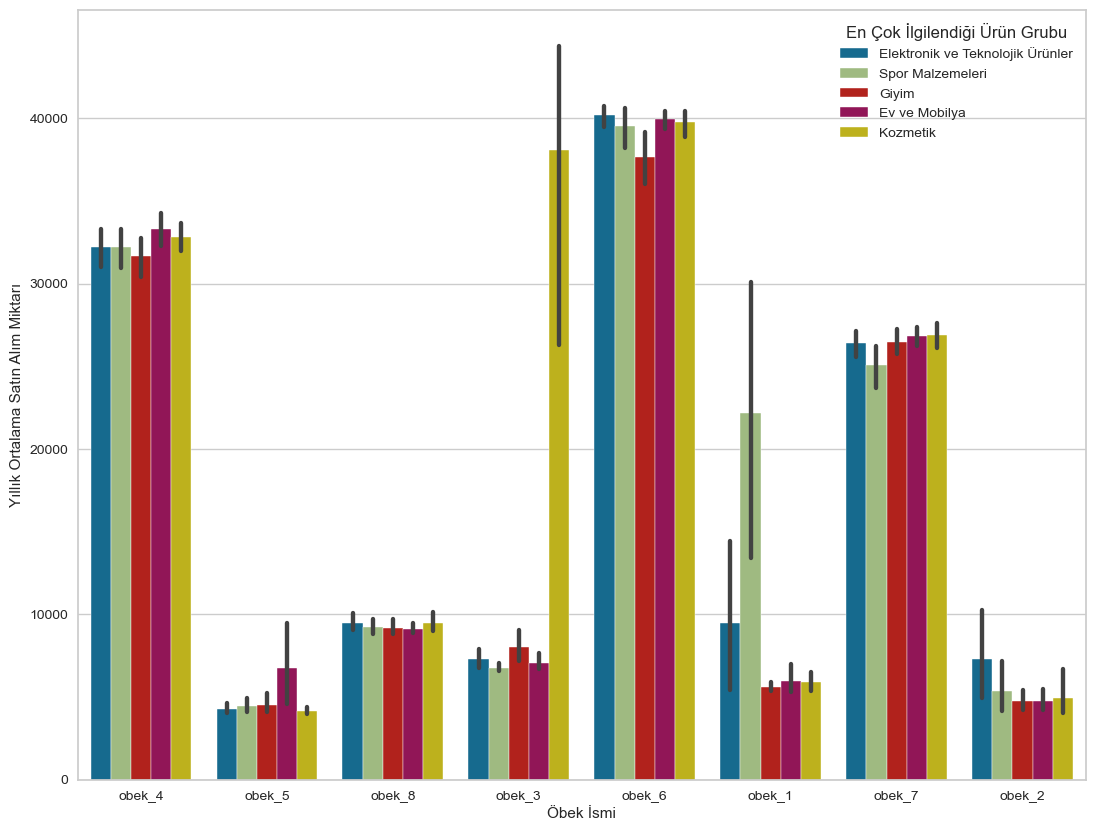

In [20]:
plt.figure(figsize=(13, 10))
sns.barplot(x="Öbek İsmi", y="Yıllık Ortalama Satın Alım Miktarı", hue = "En Çok İlgilendiği Ürün Grubu",  data=df);

In [35]:
obek_1= df[(df["Öbek İsmi"]=="obek_1") & (df["En Çok İlgilendiği Ürün Grubu"]=="Kozmetik") ][["Yıllık Ortalama Gelir"]].mean()
obek_1

Yıllık Ortalama Gelir   219120.01
dtype: float64

In [7]:
test = pd.read_csv("test_x.csv")
test.head()

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,Erkek,51-60,Evli,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,365331.93,Köy veya Kasaba,Giyim,5566.59,15.44,Etmiyor,19.65
1,1,Erkek,41-50,Bekar,Lise Mezunu,İşsiz veya Düzenli Bir İşi Yok,414899.24,Büyük Şehir,Spor Malzemeleri,6756.77,14.96,Etmiyor,19.68
2,2,Kadın,>60,Evli,Eğitimsiz,İşsiz veya Düzenli Bir İşi Yok,152825.87,Küçük Şehir,Giyim,4493.92,10.91,Etmiyor,46.90
3,3,Kadın,51-60,Evli,Doktora Ötesi,Düzenli ve Ücretli Bir İşi Var,489052.91,Köy veya Kasaba,Kozmetik,42670.65,32.33,Etmiyor,48.08
4,4,Erkek,18-30,Evli,Yüksek Lisans Mezunu,Kendi İşinin Sahibi,323635.71,Küçük Şehir,Giyim,5959.27,4.52,Etmiyor,12.75


In [8]:
df.groupby('Öbek İsmi')[['Yıllık Ortalama Gelir', 
                         'Yıllık Ortalama Satın Alım Miktarı',
                         'Yıllık Ortalama Sipariş Verilen Ürün Adedi',
                         'Yıllık Ortalama Sepete Atılan Ürün Adedi']].mean()

,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi
Öbek İsmi,,,,
obek_1,229513.85,6047.20,5.87,13.26
obek_2,172827.51,4996.04,20.67,50.99
obek_3,327899.09,7360.70,15.21,21.57
obek_4,817975.52,32405.01,38.89,98.03
obek_5,222224.04,4542.31,10.70,99.56
obek_6,480117.78,39440.27,29.78,50.68
obek_7,351949.98,26429.29,20.28,98.18
obek_8,255354.93,9277.24,49.09,146.42


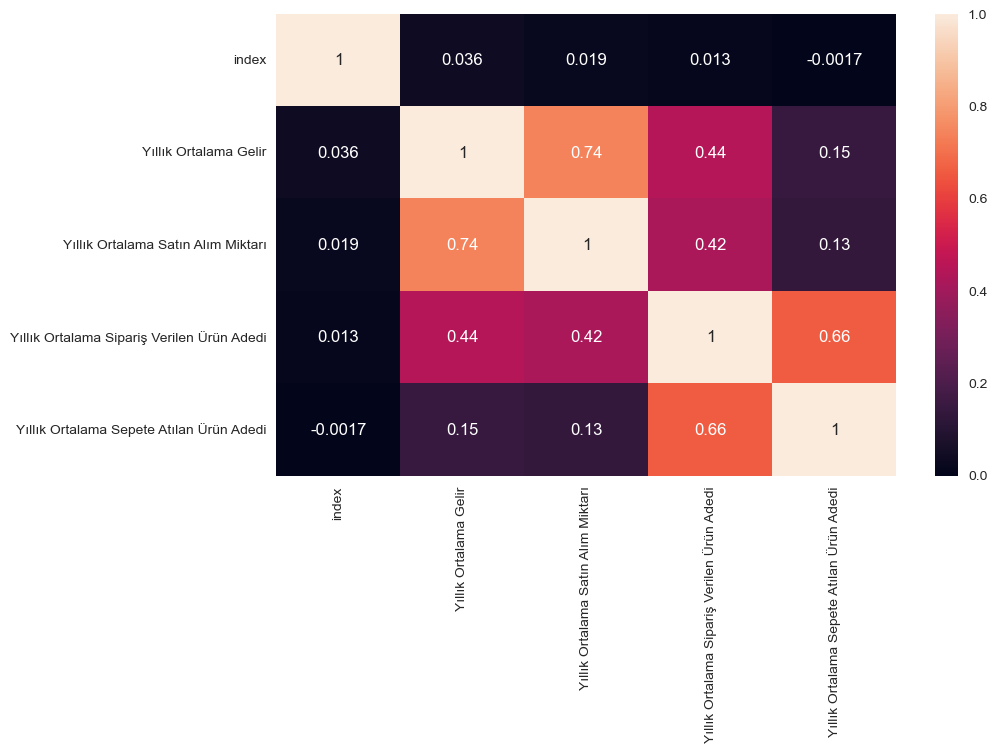

In [9]:
# Correlation between numerical features

sns.heatmap(df.corr(numeric_only=True), annot=True);

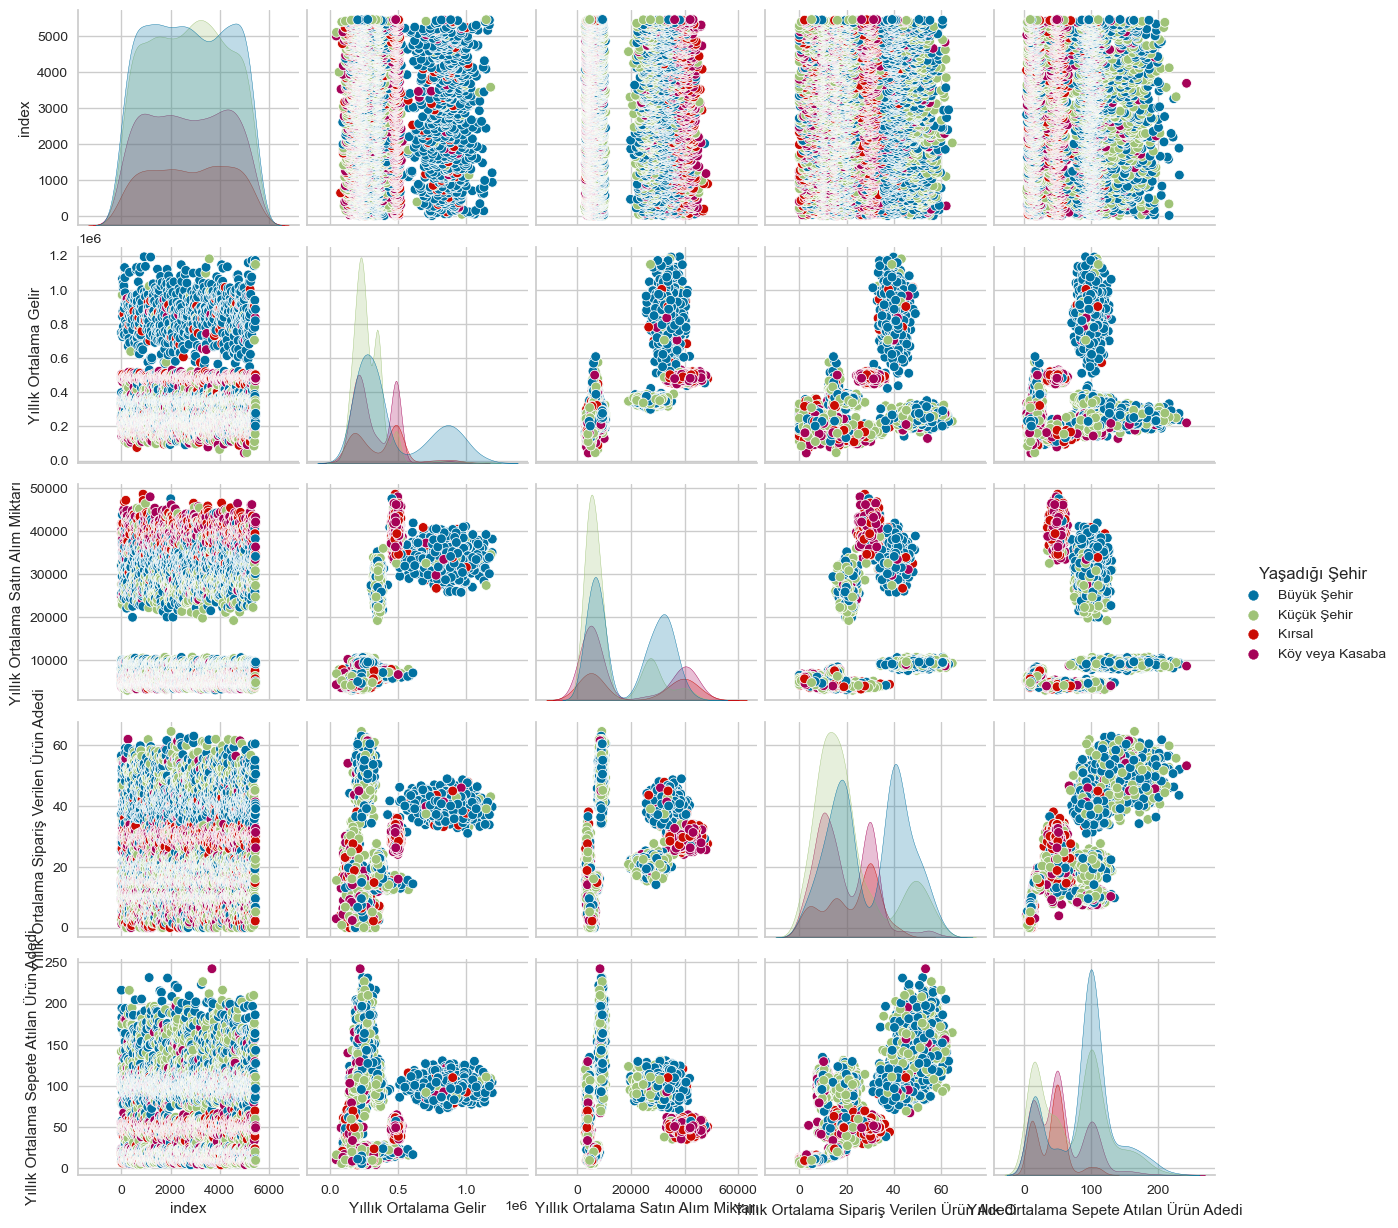

In [33]:
sns.pairplot(df, hue='Yaşadığı Şehir');

In [10]:
df["Öbek İsmi"].value_counts()

Öbek İsmi
obek_4    720
obek_8    717
obek_5    706
obek_3    695
obek_7    695
obek_1    692
obek_6    688
obek_2    547
Name: count, dtype: int64

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   index                                       2340 non-null   int64  
 1   Cinsiyet                                    2340 non-null   object 
 2   Yaş Grubu                                   2340 non-null   object 
 3   Medeni Durum                                2340 non-null   object 
 4   Eğitim Düzeyi                               2340 non-null   object 
 5   İstihdam Durumu                             2340 non-null   object 
 6   Yıllık Ortalama Gelir                       2340 non-null   float64
 7   Yaşadığı Şehir                              2340 non-null   object 
 8   En Çok İlgilendiği Ürün Grubu               2340 non-null   object 
 9   Yıllık Ortalama Satın Alım Miktarı          2340 non-null   float64
 10  Yıllık Ortal

In [16]:
df.columns

Index(['index', 'Cinsiyet', 'Yaş Grubu', 'Medeni Durum', 'Eğitim Düzeyi',
       'İstihdam Durumu', 'Yıllık Ortalama Gelir', 'Yaşadığı Şehir',
       'En Çok İlgilendiği Ürün Grubu', 'Yıllık Ortalama Satın Alım Miktarı',
       'Yıllık Ortalama Sipariş Verilen Ürün Adedi',
       'Eğitime Devam Etme Durumu', 'Öbek İsmi',
       'Yıllık Ortalama Sepete Atılan Ürün Adedi'],
      dtype='object')

In [17]:
df["Yaş Grubu"].unique()

array(['31-40', '>60', '18-30', '51-60', '41-50'], dtype=object)

In [21]:
print(df[df["Öbek İsmi"] == "obek_1"]["İstihdam Durumu"].value_counts())
print(df[df["Öbek İsmi"] == "obek_2"]["İstihdam Durumu"].value_counts())
print(df[df["Öbek İsmi"] == "obek_3"]["İstihdam Durumu"].value_counts())
print(df[df["Öbek İsmi"] == "obek_4"]["İstihdam Durumu"].value_counts())
print(df[df["Öbek İsmi"] == "obek_5"]["İstihdam Durumu"].value_counts())
print(df[df["Öbek İsmi"] == "obek_6"]["İstihdam Durumu"].value_counts())
print(df[df["Öbek İsmi"] == "obek_7"]["İstihdam Durumu"].value_counts())
print(df[df["Öbek İsmi"] == "obek_"]["İstihdam Durumu"].value_counts())

İstihdam Durumu
Düzenli ve Ücretli Bir İşi Var    357
İşsiz veya Düzenli Bir İşi Yok    205
Kendi İşinin Sahibi               127
Emekli                              3
Name: count, dtype: int64
İstihdam Durumu
İşsiz veya Düzenli Bir İşi Yok    417
Düzenli ve Ücretli Bir İşi Var     97
Kendi İşinin Sahibi                29
Emekli                              4
Name: count, dtype: int64
İstihdam Durumu
Düzenli ve Ücretli Bir İşi Var    281
Kendi İşinin Sahibi               225
İşsiz veya Düzenli Bir İşi Yok    124
Emekli                             65
Name: count, dtype: int64
İstihdam Durumu
Düzenli ve Ücretli Bir İşi Var    363
İşsiz veya Düzenli Bir İşi Yok    252
Kendi İşinin Sahibi               101
Emekli                              4
Name: count, dtype: int64
İstihdam Durumu
Düzenli ve Ücretli Bir İşi Var    428
Kendi İşinin Sahibi               156
İşsiz veya Düzenli Bir İşi Yok    119
Emekli                              3
Name: count, dtype: int64
İstihdam Durumu
Emekli        

<Figure size 2000x2000 with 0 Axes>

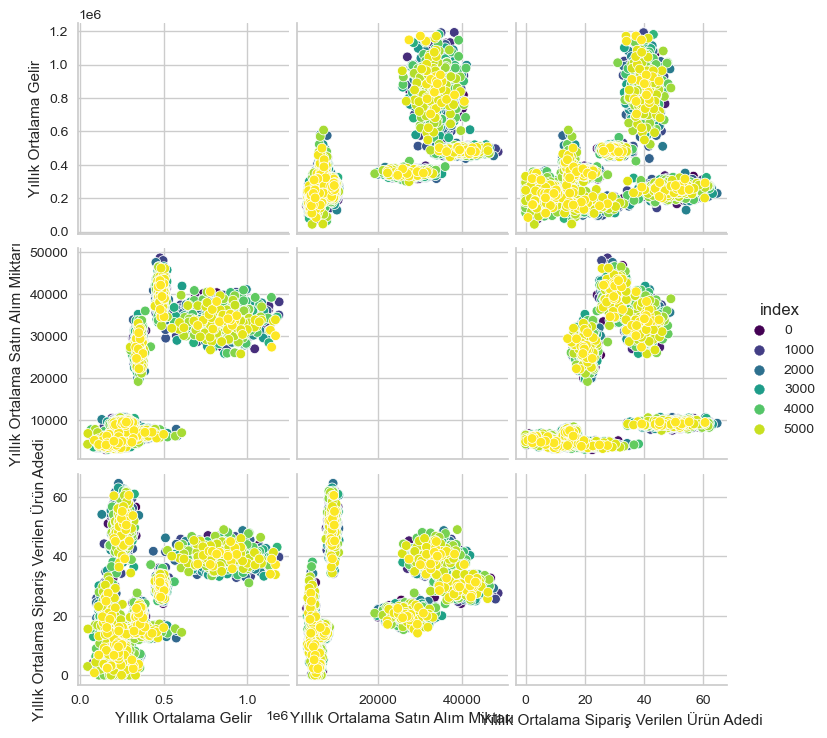

In [23]:
plt.figure(figsize=(20, 20))
sns.pairplot(df[['Yıllık Ortalama Gelir', 'Yıllık Ortalama Satın Alım Miktarı', 'Yıllık Ortalama Sipariş Verilen Ürün Adedi', 'index']], hue='index', palette="viridis");

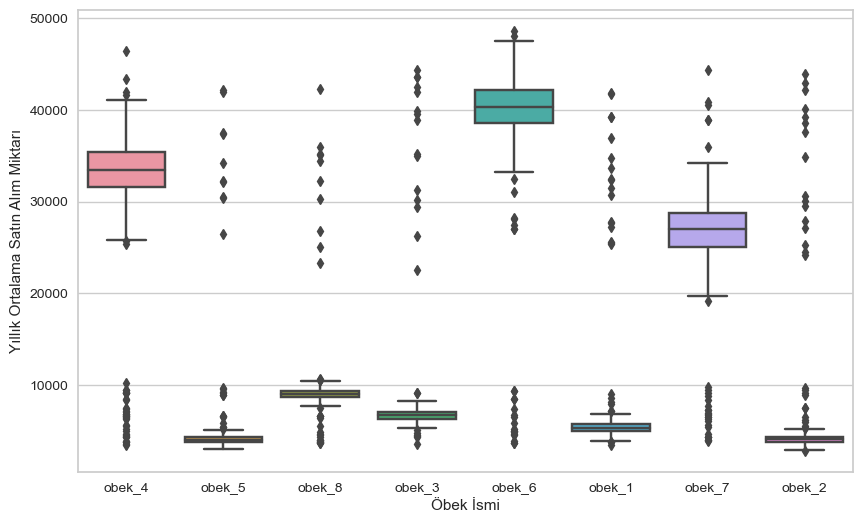

In [25]:
sns.boxplot(x="Öbek İsmi", y="Yıllık Ortalama Satın Alım Miktarı", data=df);

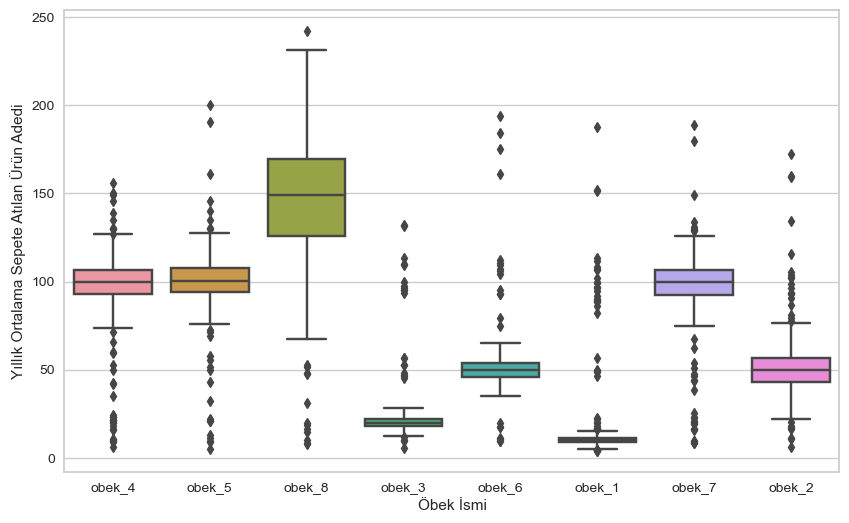

In [26]:
sns.boxplot(x="Öbek İsmi", y="Yıllık Ortalama Sepete Atılan Ürün Adedi", data=df);

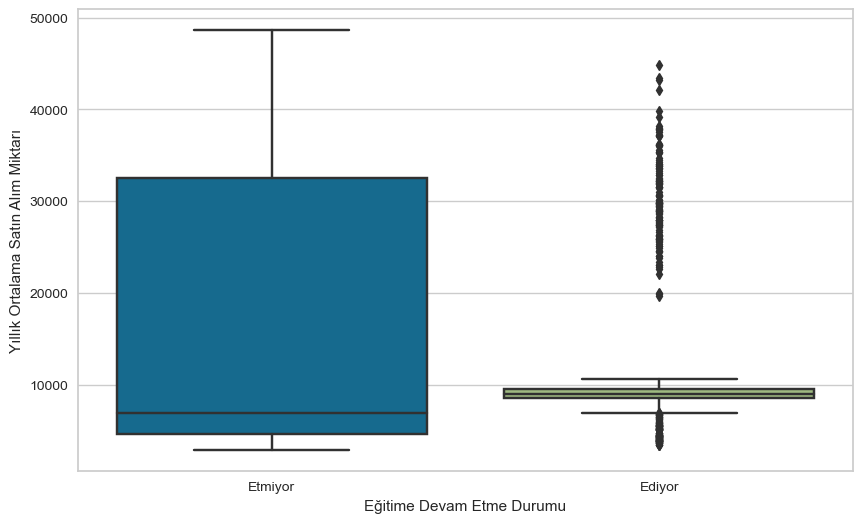

In [27]:
sns.boxplot(x="Eğitime Devam Etme Durumu", y="Yıllık Ortalama Satın Alım Miktarı", data=df);

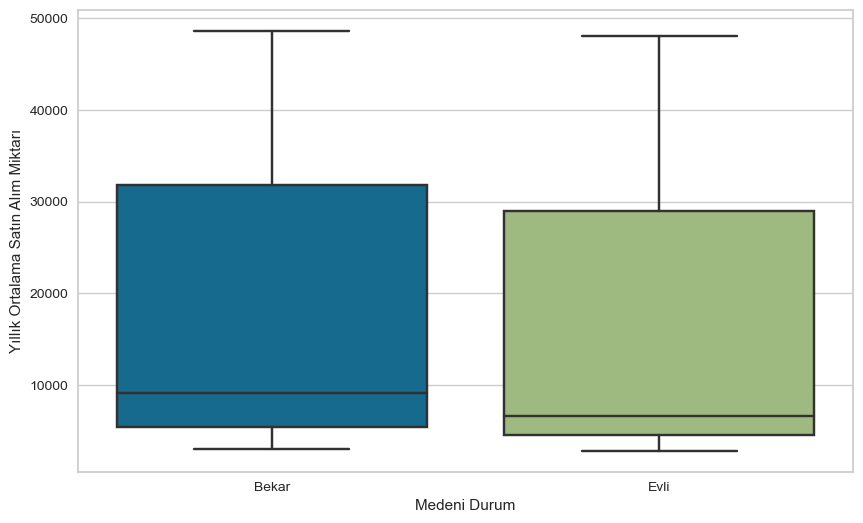

In [28]:
sns.boxplot(x="Medeni Durum", y="Yıllık Ortalama Satın Alım Miktarı", data=df);

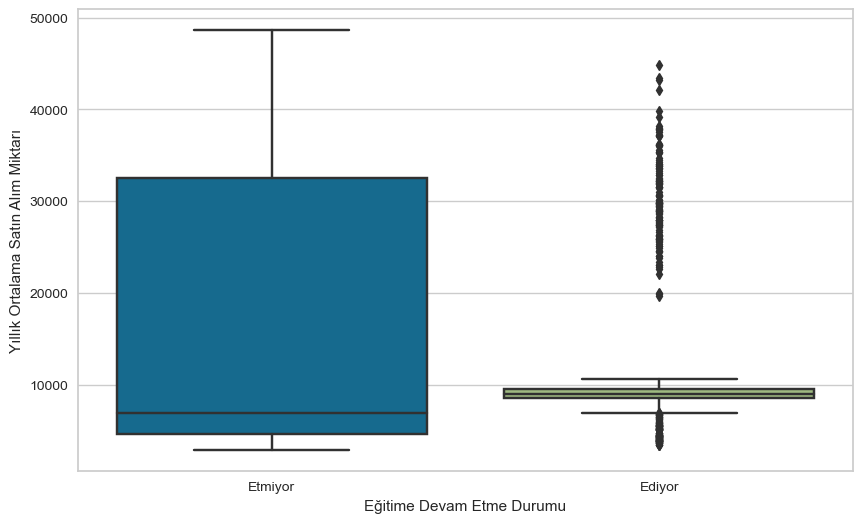

In [29]:
sns.boxplot(x="Eğitime Devam Etme Durumu", y="Yıllık Ortalama Satın Alım Miktarı", data=df);

In [ ]:
df.head()

In [31]:
df["En Çok İlgilendiği Ürün Grubu"].value_counts()

En Çok İlgilendiği Ürün Grubu
Giyim                               1487
Ev ve Mobilya                       1114
Elektronik ve Teknolojik Ürünler    1029
Spor Malzemeleri                    1001
Kozmetik                             829
Name: count, dtype: int64

In [32]:
df["C"]= df['Cinsiyet'] + " " + df['Yaş Grubu'] + " " + df["Medeni Durum"]

In [33]:
df["C"]

0       Kadın 31-40 Bekar
1          Erkek >60 Evli
2       Erkek 18-30 Bekar
3        Erkek 51-60 Evli
4        Erkek 31-40 Evli
              ...        
5455      Kadın >60 Bekar
5456     Erkek 51-60 Evli
5457     Kadın 51-60 Evli
5458    Kadın 18-30 Bekar
5459    Erkek 18-30 Bekar
Name: C, Length: 5460, dtype: object

In [34]:
df["A"] = df["Yıllık Ortalama Satın Alım Miktarı"] / df["Yıllık Ortalama Gelir"]

In [35]:
df["B"] = df["Yıllık Ortalama Sipariş Verilen Ürün Adedi"] / df["Yıllık Ortalama Sepete Atılan Ürün Adedi"]

In [36]:
df.head().T

,0,1,2,3,4
index,0,1,2,3,4
Cinsiyet,Kadın,Erkek,Erkek,Erkek,Erkek
Yaş Grubu,31-40,>60,18-30,51-60,31-40
Medeni Durum,Bekar,Evli,Bekar,Evli,Evli
Eğitim Düzeyi,Yüksek Lisans Mezunu,Lise Mezunu,Lise Mezunu,Lise Mezunu,Ortaokul Mezunu
İstihdam Durumu,Düzenli ve Ücretli Bir İşi Var,Kendi İşinin Sahibi,Düzenli ve Ücretli Bir İşi Var,Kendi İşinin Sahibi,İşsiz veya Düzenli Bir İşi Yok
Yıllık Ortalama Gelir,748266.44,246298.61,268582.73,327721.84,397431.63
Yaşadığı Şehir,Büyük Şehir,Küçük Şehir,Küçük Şehir,Kırsal,Büyük Şehir
En Çok İlgilendiği Ürün Grubu,Elektronik ve Teknolojik Ürünler,Spor Malzemeleri,Giyim,Giyim,Giyim
Yıllık Ortalama Satın Alım Miktarı,32010.90,4145.73,9924.38,6417.78,7886.66


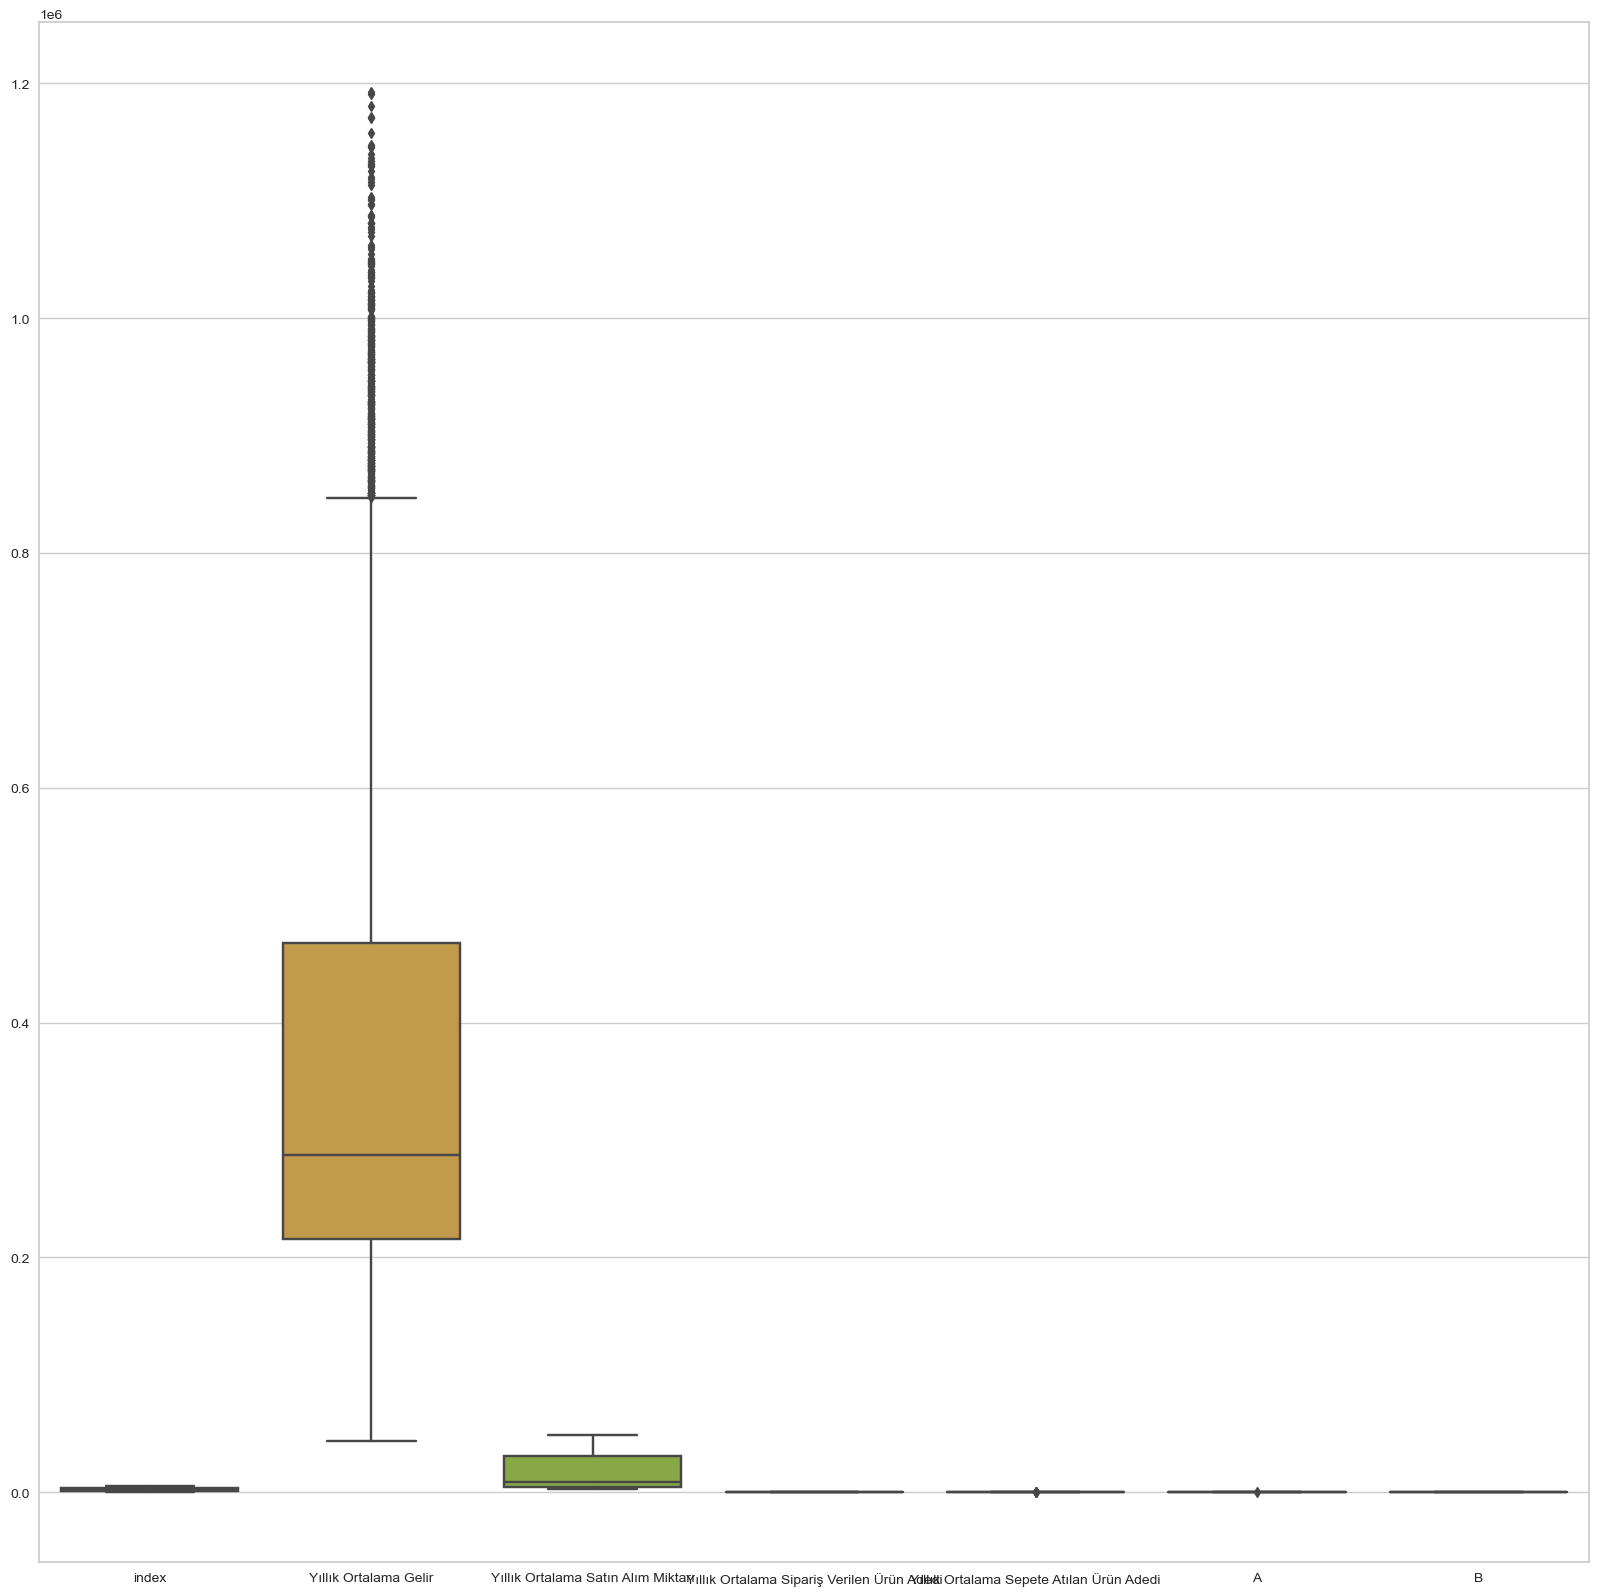

In [37]:
plt.figure(figsize=(20, 20))
sns.boxplot(df);

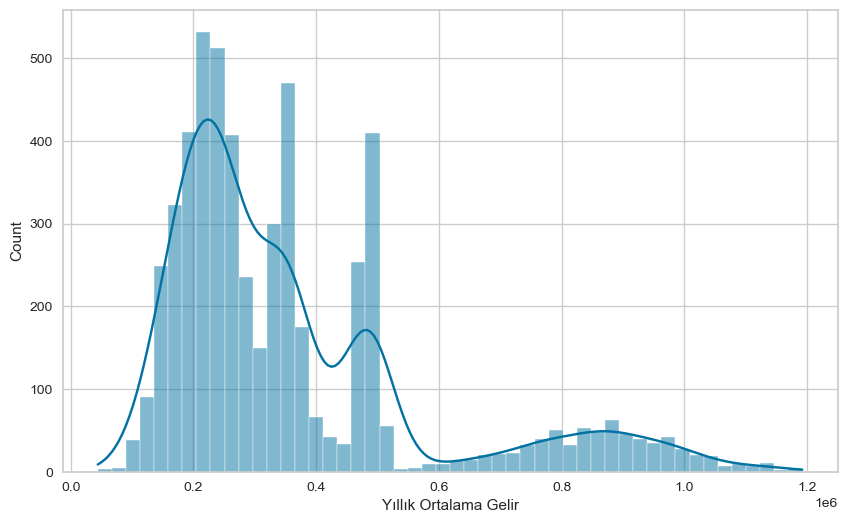

In [38]:
sns.histplot(df["Yıllık Ortalama Gelir"], bins=50, kde=True);

In [39]:
df[df["Yıllık Ortalama Gelir"] > 1100000]

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi,C,A,B
134,134,Erkek,18-30,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,1129541.78,Büyük Şehir,Ev ve Mobilya,36251.66,40.30,Etmiyor,obek_4,97.43,Erkek 18-30 Bekar,0.03,0.41
335,335,Kadın,31-40,Bekar,Üniversite Mezunu,Düzenli ve Ücretli Bir İşi Var,1101342.46,Büyük Şehir,Giyim,31893.71,37.42,Etmiyor,obek_4,79.12,Kadın 31-40 Bekar,0.03,0.47
612,612,Erkek,31-40,Evli,Yüksekokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,1116167.00,Büyük Şehir,Elektronik ve Teknolojik Ürünler,35100.92,40.02,Etmiyor,obek_4,104.44,Erkek 31-40 Evli,0.03,0.38
620,620,Kadın,18-30,Bekar,Üniversite Mezunu,Kendi İşinin Sahibi,1129676.79,Büyük Şehir,Elektronik ve Teknolojik Ürünler,37177.12,38.01,Etmiyor,obek_4,113.81,Kadın 18-30 Bekar,0.03,0.33
744,744,Erkek,31-40,Bekar,Üniversite Mezunu,Kendi İşinin Sahibi,1102917.69,Büyük Şehir,Spor Malzemeleri,36103.47,38.61,Etmiyor,obek_4,99.48,Erkek 31-40 Bekar,0.03,0.39
789,789,Kadın,18-30,Bekar,Üniversite Mezunu,Düzenli ve Ücretli Bir İşi Var,1131561.29,Büyük Şehir,Giyim,37131.16,36.73,Etmiyor,obek_4,80.67,Kadın 18-30 Bekar,0.03,0.46
927,927,Erkek,31-40,Evli,Üniversite Mezunu,İşsiz veya Düzenli Bir İşi Yok,1192437.15,Büyük Şehir,Ev ve Mobilya,38124.30,39.79,Etmiyor,obek_4,91.80,Erkek 31-40 Evli,0.03,0.43
980,980,Kadın,31-40,Evli,Üniversite Mezunu,Düzenli ve Ücretli Bir İşi Var,1136323.16,Büyük Şehir,Giyim,32401.61,39.59,Etmiyor,obek_4,80.55,Kadın 31-40 Evli,0.03,0.49
1193,1193,Kadın,31-40,Bekar,Doktora Ötesi,İşsiz veya Düzenli Bir İşi Yok,1191020.04,Büyük Şehir,Spor Malzemeleri,34985.51,39.78,Etmiyor,obek_4,104.77,Kadın 31-40 Bekar,0.03,0.38
1470,1470,Kadın,31-40,Evli,Lise Mezunu,İşsiz veya Düzenli Bir İşi Yok,1120230.23,Büyük Şehir,Ev ve Mobilya,36014.09,41.99,Etmiyor,obek_4,105.28,Kadın 31-40 Evli,0.03,0.40


In [40]:
df = df[df["Yıllık Ortalama Gelir"] <= 1100000]
train = df

In [41]:
train

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi,C,A,B
0,0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.44,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.90,37.31,Etmiyor,obek_4,102.94,Kadın 31-40 Bekar,0.04,0.36
1,1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,246298.61,Küçük Şehir,Spor Malzemeleri,4145.73,11.55,Etmiyor,obek_5,82.18,Erkek >60 Evli,0.02,0.14
2,2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,268582.73,Küçük Şehir,Giyim,9924.38,55.35,Ediyor,obek_8,141.66,Erkek 18-30 Bekar,0.04,0.39
3,3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,327721.84,Kırsal,Giyim,6417.78,15.42,Etmiyor,obek_3,17.10,Erkek 51-60 Evli,0.02,0.90
4,4,Erkek,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,397431.63,Büyük Şehir,Giyim,7886.66,14.69,Etmiyor,obek_3,20.47,Erkek 31-40 Evli,0.02,0.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455,5455,Kadın,>60,Bekar,Üniversite Mezunu,Emekli,478054.25,Köy veya Kasaba,Kozmetik,43182.30,31.36,Etmiyor,obek_6,51.60,Kadın >60 Bekar,0.09,0.61
5456,5456,Erkek,51-60,Evli,Doktora Ötesi,Kendi İşinin Sahibi,481852.85,Köy veya Kasaba,Ev ve Mobilya,42108.00,26.29,Etmiyor,obek_6,49.19,Erkek 51-60 Evli,0.09,0.53
5457,5457,Kadın,51-60,Evli,İlkokul Mezunu,Düzenli ve Ücretli Bir İşi Var,309443.69,Küçük Şehir,Ev ve Mobilya,4655.39,5.16,Etmiyor,obek_1,9.54,Kadın 51-60 Evli,0.02,0.54
5458,5458,Kadın,18-30,Bekar,Yüksekokul Mezunu,Düzenli ve Ücretli Bir İşi Var,266604.27,Büyük Şehir,Ev ve Mobilya,9016.17,39.21,Ediyor,obek_8,143.28,Kadın 18-30 Bekar,0.03,0.27


In [42]:
df[df["Yıllık Ortalama Gelir"] < 90000]

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi,C,A,B
634,634,Kadın,18-30,Evli,Eğitimsiz,Düzenli ve Ücretli Bir İşi Var,75864.85,Kırsal,Kozmetik,5120.75,4.02,Etmiyor,obek_1,9.61,Kadın 18-30 Evli,0.07,0.42
3520,3520,Kadın,51-60,Evli,İlkokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,79099.87,Köy veya Kasaba,Giyim,3487.99,12.99,Etmiyor,obek_2,49.07,Kadın 51-60 Evli,0.04,0.26
3994,3994,Erkek,18-30,Evli,İlkokul Mezunu,Kendi İşinin Sahibi,64602.21,Küçük Şehir,Giyim,7665.47,15.69,Etmiyor,obek_3,16.13,Erkek 18-30 Evli,0.12,0.97
4785,4785,Erkek,51-60,Evli,Üniversite Mezunu,İşsiz veya Düzenli Bir İşi Yok,89054.09,Kırsal,Spor Malzemeleri,7712.41,16.85,Etmiyor,obek_3,20.73,Erkek 51-60 Evli,0.09,0.81
4999,4999,Kadın,18-30,Evli,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,43922.99,Köy veya Kasaba,Kozmetik,4169.95,2.93,Etmiyor,obek_1,10.41,Kadın 18-30 Evli,0.09,0.28
5100,5100,Erkek,18-30,Evli,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,45695.09,Küçük Şehir,Spor Malzemeleri,6740.64,15.56,Ediyor,obek_3,16.28,Erkek 18-30 Evli,0.15,0.96
5391,5391,Kadın,41-50,Evli,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,84624.42,Küçük Şehir,Giyim,5120.25,0.79,Etmiyor,obek_1,5.54,Kadın 41-50 Evli,0.06,0.14


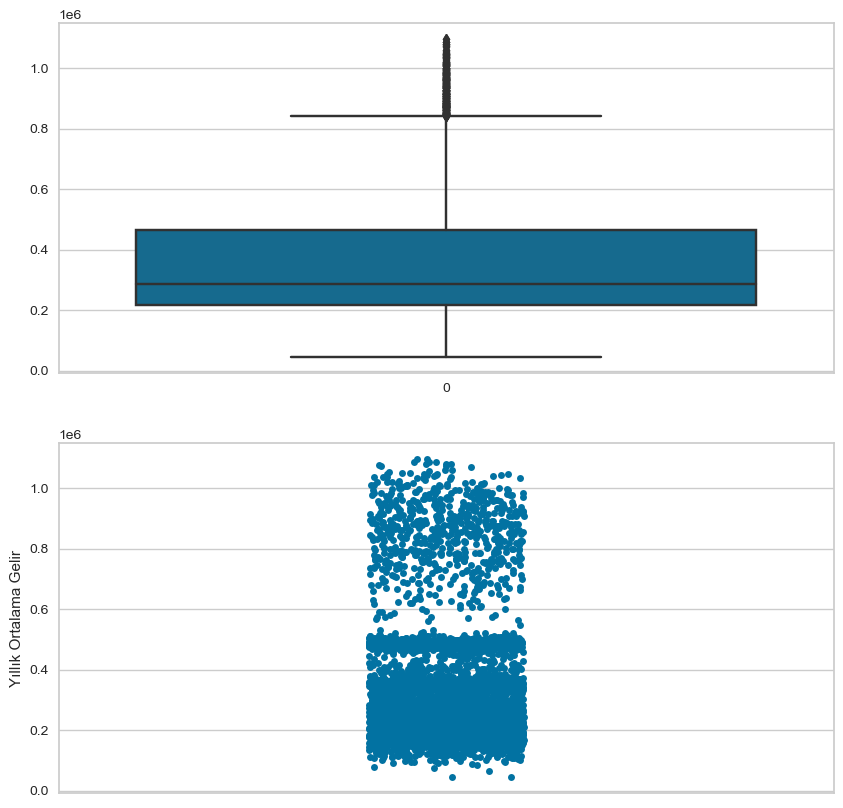

In [43]:
plt.figure(figsize=(10,10))

plt.subplot(211)
sns.boxplot(df["Yıllık Ortalama Gelir"])

plt.subplot(212)
sns.stripplot(df["Yıllık Ortalama Gelir"]);

In [44]:
def eval_metric(model, X_train, y_train, X_test, y_test):   
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [45]:
train.columns

Index(['index', 'Cinsiyet', 'Yaş Grubu', 'Medeni Durum', 'Eğitim Düzeyi',
       'İstihdam Durumu', 'Yıllık Ortalama Gelir', 'Yaşadığı Şehir',
       'En Çok İlgilendiği Ürün Grubu', 'Yıllık Ortalama Satın Alım Miktarı',
       'Yıllık Ortalama Sipariş Verilen Ürün Adedi',
       'Eğitime Devam Etme Durumu', 'Öbek İsmi',
       'Yıllık Ortalama Sepete Atılan Ürün Adedi', 'C', 'A', 'B'],
      dtype='object')

In [46]:
columns_to_drop = ["index", "Medeni Durum", "Eğitim Düzeyi", "Yıllık Ortalama Sepete Atılan Ürün Adedi", "Öbek İsmi", 'En Çok İlgilendiği Ürün Grubu']

In [47]:
train = train.drop(columns_to_drop, axis = 1)
train

,Cinsiyet,Yaş Grubu,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,C,A,B
0,Kadın,31-40,Düzenli ve Ücretli Bir İşi Var,748266.44,Büyük Şehir,32010.90,37.31,Etmiyor,Kadın 31-40 Bekar,0.04,0.36
1,Erkek,>60,Kendi İşinin Sahibi,246298.61,Küçük Şehir,4145.73,11.55,Etmiyor,Erkek >60 Evli,0.02,0.14
2,Erkek,18-30,Düzenli ve Ücretli Bir İşi Var,268582.73,Küçük Şehir,9924.38,55.35,Ediyor,Erkek 18-30 Bekar,0.04,0.39
3,Erkek,51-60,Kendi İşinin Sahibi,327721.84,Kırsal,6417.78,15.42,Etmiyor,Erkek 51-60 Evli,0.02,0.90
4,Erkek,31-40,İşsiz veya Düzenli Bir İşi Yok,397431.63,Büyük Şehir,7886.66,14.69,Etmiyor,Erkek 31-40 Evli,0.02,0.72
...,...,...,...,...,...,...,...,...,...,...,...
5455,Kadın,>60,Emekli,478054.25,Köy veya Kasaba,43182.30,31.36,Etmiyor,Kadın >60 Bekar,0.09,0.61
5456,Erkek,51-60,Kendi İşinin Sahibi,481852.85,Köy veya Kasaba,42108.00,26.29,Etmiyor,Erkek 51-60 Evli,0.09,0.53
5457,Kadın,51-60,Düzenli ve Ücretli Bir İşi Var,309443.69,Küçük Şehir,4655.39,5.16,Etmiyor,Kadın 51-60 Evli,0.02,0.54
5458,Kadın,18-30,Düzenli ve Ücretli Bir İşi Var,266604.27,Büyük Şehir,9016.17,39.21,Ediyor,Kadın 18-30 Bekar,0.03,0.27


In [48]:
#train = pd.read_csv('train.csv')
test = pd.read_csv('test_x.csv')

df = train.copy()

In [49]:
columns_to_drop2 = columns_to_drop = ["index", "Medeni Durum", "Eğitim Düzeyi", "Yıllık Ortalama Sepete Atılan Ürün Adedi", 'En Çok İlgilendiği Ürün Grubu']

In [50]:
test = test.drop(columns_to_drop2, axis = 1)
test

,Cinsiyet,Yaş Grubu,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu
0,Erkek,51-60,Düzenli ve Ücretli Bir İşi Var,365331.93,Köy veya Kasaba,5566.59,15.44,Etmiyor
1,Erkek,41-50,İşsiz veya Düzenli Bir İşi Yok,414899.24,Büyük Şehir,6756.77,14.96,Etmiyor
2,Kadın,>60,İşsiz veya Düzenli Bir İşi Yok,152825.87,Küçük Şehir,4493.92,10.91,Etmiyor
3,Kadın,51-60,Düzenli ve Ücretli Bir İşi Var,489052.91,Köy veya Kasaba,42670.65,32.33,Etmiyor
4,Erkek,18-30,Kendi İşinin Sahibi,323635.71,Küçük Şehir,5959.27,4.52,Etmiyor
...,...,...,...,...,...,...,...,...
2335,Kadın,18-30,Kendi İşinin Sahibi,259190.08,Küçük Şehir,9559.16,41.88,Ediyor
2336,Kadın,31-40,İşsiz veya Düzenli Bir İşi Yok,194580.56,Kırsal,4070.23,20.08,Etmiyor
2337,Erkek,>60,Düzenli ve Ücretli Bir İşi Var,357730.52,Büyük Şehir,22589.20,18.92,Etmiyor
2338,Erkek,18-30,Düzenli ve Ücretli Bir İşi Var,213179.64,Küçük Şehir,4205.39,10.76,Etmiyor


In [53]:
#test['A'] = test['Yıllık Ortalama Sipariş Verilen Ürün Adedi'] / test['Yıllık Ortalama Sepete Atılan Ürün Adedi'] 
#test['B'] = test['Yıllık Ortalama Satın Alım Miktarı'] / test['Yıllık Ortalama Gelir']
#test['C'] = test['Yıllık Ortalama Satın Alım Miktarı'] / test['Yıllık Ortalama Sipariş Verilen Ürün Adedi']
#test["D"]= test['Cinsiyet'] + " " + test['Yaş Grubu'] + " " + test["Medeni Durum"]

In [56]:
from sklearn.model_selection import train_test_split

X = df.drop(["Öbek İsmi", 'index'], axis=1)
y = df["Öbek İsmi"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

KeyError: "['Öbek İsmi', 'index'] not found in axis"

In [57]:
cat = X_train.select_dtypes("object").columns
cat

NameError: name 'X_train' is not defined

In [ ]:
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', 
                         unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), 
                                        remainder='passthrough')

In [ ]:
import lightgbm as lgb

operations_lightgbm = [("OrdinalEncoder", column_trans), 
                       ("lightgbm_model", lgb.LGBMClassifier(random_state=42))]

lightgbm_model = Pipeline(steps=operations_lightgbm)

lightgbm_model.fit(X_train, y_train)

In [ ]:
eval_metric(lightgbm_model, X_train, y_train, X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = lightgbm_model.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))